** **

**Trabalho 3: Aula Laboratório**

**Grupo 4**

**ICMC/USP - São Carlos SP**

** **

**Leitura dos dados e Importação das bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as sts
from scipy.stats import f
import math
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_context("talk")

In [ ]:
#Leitura dos dados
dados = pd.read_csv('data-table-B9.csv',encoding= 'utf-8',decimal = ',')

x = dados.drop(['y'],axis = 1)
y = dados['y']

#**1) Análise Descritiva**
Faça uma análise descritiva completa dos seus
dados, faça gráficos de dispersão, box plots e histogramas de cada uma das variáveis de seu conjunto
de dados e interprete.

In [ ]:
print(f'Contém {dados.shape[0]} Linhas e {dados.shape[1]} Colunas')
dados.head()

Contém 62 Linhas e 5 Colunas


,x1,x2,x3,x4,y
0,2.14,10.0,0.34,1.000,28.9
1,4.14,10.0,0.34,1.000,31.0
2,8.15,10.0,0.34,1.000,26.4
3,2.14,10.0,0.34,0.246,27.2
4,4.14,10.0,0.34,0.379,26.1


In [ ]:
# Tabela descritiva
round(dados.melt().groupby('variable').describe(),2)

value                                                 
         count   mean    std   min    25%    50%    75%     max
variable                                                       
x1        62.0   4.78   1.99  2.14   4.14   4.30   5.60    8.15
x2        62.0  22.25  37.45  1.25   2.63  10.00  10.10  112.00
x3        62.0   0.35   0.06  0.25   0.34   0.34   0.34    0.55
x4        62.0   0.60   0.23  0.08   0.47   0.62   0.78    1.00
y         62.0  23.51   8.72  8.40  16.65  21.75  27.95   48.60

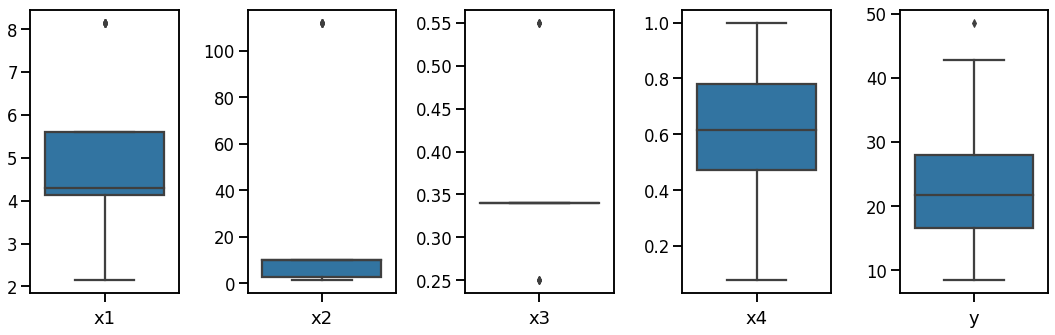

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15,5), tight_layout=True)
plt.subplots_adjust(hspace=0.40)

for i in list(range(5)):
  sns.boxplot(y=dados[list(dados.columns)[i]], ax=axes[i]).set(xlabel=list(dados.columns)[i], ylabel='')

plt.savefig('boxplots.pdf')

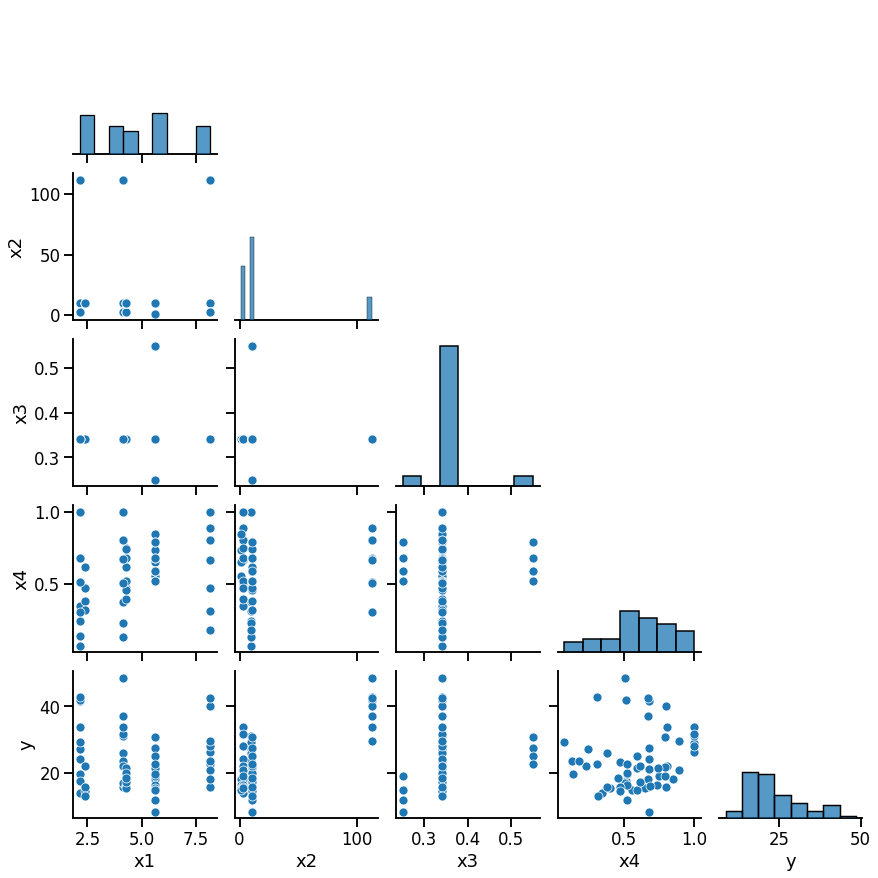

In [ ]:
sns.pairplot(dados, corner=True)
plt.savefig('pairplot.pdf')

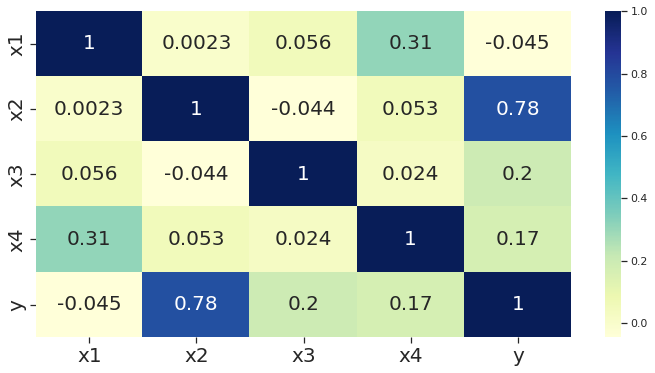

In [ ]:
sns.set_theme(style="ticks")
p = plt.figure(figsize = (12,6))
p = sns.heatmap(dados.corr(),cmap="YlGnBu",annot = True, annot_kws={'size':20})
p.set_yticklabels(list(dados.columns), size = 20)
p.set_xticklabels(list(dados.columns), size = 20)
plt.savefig('corr.pdf')

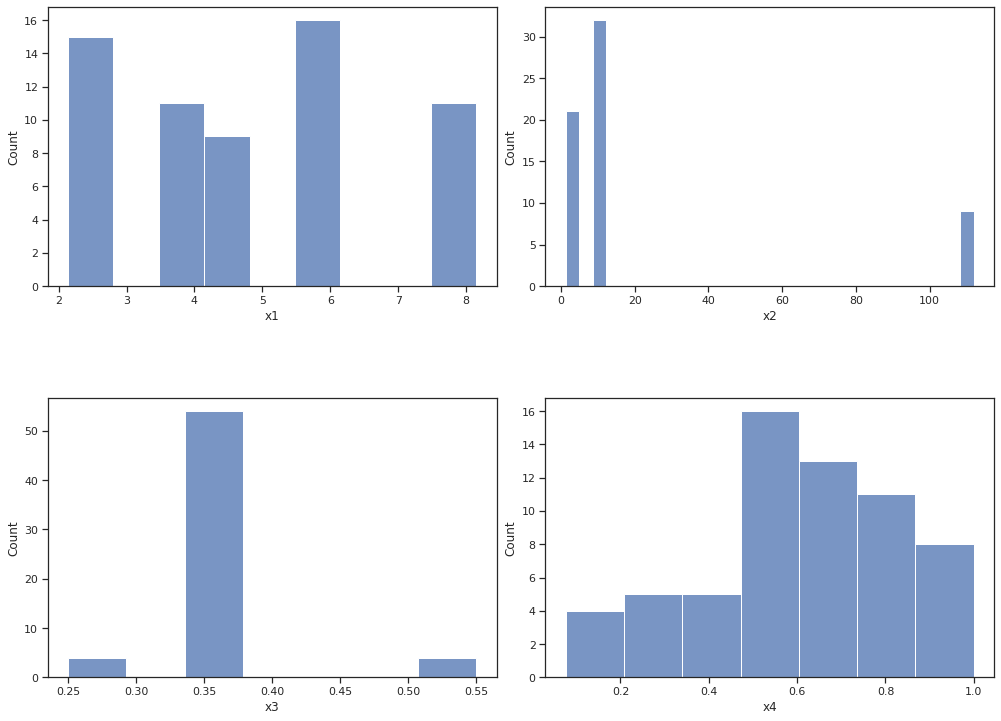

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,10))
plt.tight_layout()
plt.subplots_adjust(hspace=0.40)

sns.histplot(ax = axes[0,0],x = dados['x1'])
sns.histplot(ax = axes[0,1],x = dados['x2'])
sns.histplot(ax = axes[1,0],x = dados['x3'])
sns.histplot(ax = axes[1,1],x = dados['x4'])

plt.savefig('ved.pdf', format='pdf')


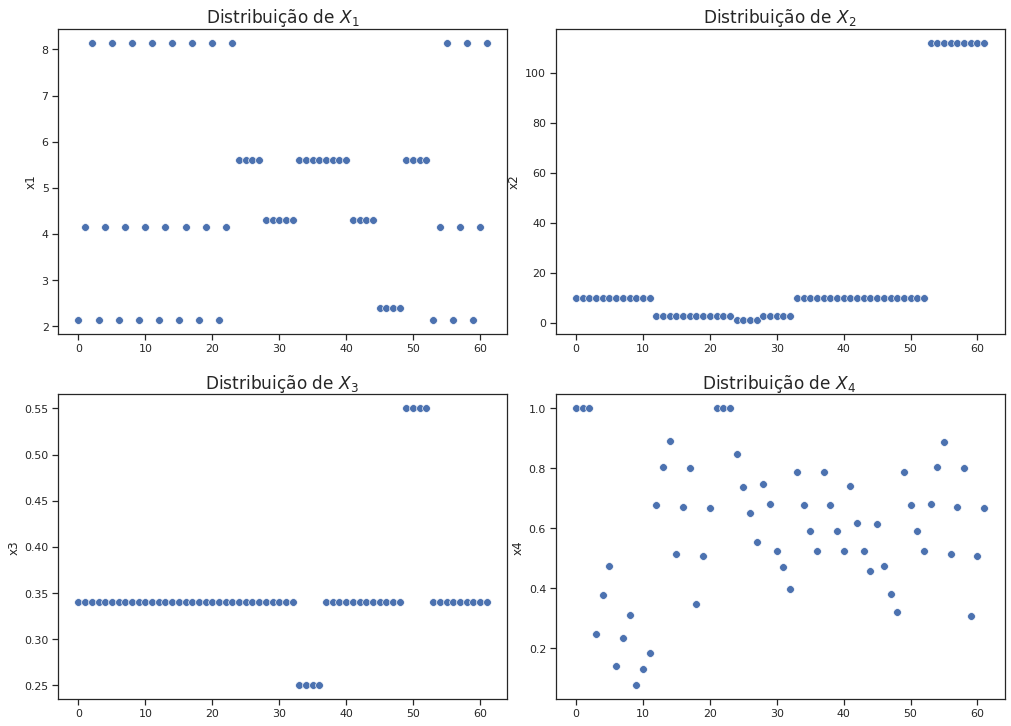

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,10))
plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)

sns.scatterplot(ax = axes[0,0],x = range(len(dados)), y = dados['x1'],s = 60)
axes[0,0].set_title('Distribuição de $X_1$',size = 17)

sns.scatterplot(ax = axes[0,1],x = range(len(dados)), y = dados['x2'], s = 60)
axes[0,1].set_title('Distribuição de $X_2$',size = 17)

sns.scatterplot(ax = axes[1,0],x = range(len(dados)), y = dados['x3'],s = 60)
axes[1,0].set_title('Distribuição de $X_3$ ',size = 17)

sns.scatterplot(ax = axes[1,1],x = range(len(dados)), y = dados['x4'], s = 60)
axes[1,1].set_title('Distribuição de $X_4$ ',size = 17)

plt.savefig('scatter.pdf', format='pdf')


#**2) Matriz Hat**

Calcule os valores da matriz hat. Apresente os valores $h_{ii}$ e faça análise destes. Determine possíveis
outliers ou pontos de alavanca.


\begin{align}
Hat = X(X^TX)^{-1}X^T
\end{align}

In [ ]:
x = sm.add_constant(x)
x_transposta = x.T
x_transposta_x = x_transposta.dot(x)
inversa_x_transposta_x = np.linalg.inv(x_transposta_x)
hat = x.dot(inversa_x_transposta_x.dot(x_transposta))

In [ ]:
hat_ii = np.diag(hat)
dados['H_ii'] = hat_ii
dados

,x1,x2,x3,x4,y,H_ii
0,2.14,10.0,0.34,1.000,28.9,0.130355
1,4.14,10.0,0.34,1.000,31.0,0.080694
2,8.15,10.0,0.34,1.000,26.4,0.091969
3,2.14,10.0,0.34,0.246,27.2,0.068995
4,4.14,10.0,0.34,0.379,26.1,0.032821
...,...,...,...,...,...,...
57,4.14,112.0,0.34,0.672,37.1,0.113413
58,8.15,112.0,0.34,0.801,40.1,0.157829
59,2.14,112.0,0.34,0.306,42.7,0.157234
60,4.14,112.0,0.34,0.506,48.6,0.115580


In [ ]:
hat_ii

array([0.13035485, 0.08069374, 0.0919687 , 0.06899521, 0.03282139,
       0.08635833, 0.09083095, 0.05905534, 0.12244829, 0.1080703 ,
       0.08599569, 0.16297296, 0.06045242, 0.04067902, 0.07849929,
       0.04970293, 0.0259764 , 0.07090045, 0.05760169, 0.02414913,
       0.06945631, 0.1339128 , 0.0841644 , 0.09526436, 0.04128667,
       0.0287917 , 0.02481751, 0.02631409, 0.03160728, 0.02553778,
       0.0229289 , 0.02574848, 0.03290158, 0.07859805, 0.07044101,
       0.0699363 , 0.07302304, 0.02979851, 0.02189836, 0.02159321,
       0.02483363, 0.02774825, 0.01955599, 0.02020939, 0.02429096,
       0.04506133, 0.04197198, 0.04722174, 0.0538462 , 0.22471216,
       0.21741143, 0.2175719 , 0.2211709 , 0.14652195, 0.12480724,
       0.16319546, 0.13964624, 0.11341269, 0.1578294 , 0.15723369,
       0.11558027, 0.1596198 ])

In [ ]:
sum(hat_ii)

5.000000000000025

#**3) Análise de Resíduos**
Ajuste um modelo de regressão linear múltipla (ml). Apresentar o resumo do modelo (summary), faça análise dos 4 gráficos seguintes:  

*   Resíduos versus Valores Ajustados
*   Residuos Estandardizados versus Quantis Teóricos (qqplot)
*   Raiz de Resíduos Estandardizados versus Valores Ajustados
*   Resíduos Estandardizados versus Pontos de Alavancagem.
 


In [ ]:
#Implementando o modelo
X2 = sm.add_constant(x)
regressao = sm.OLS(y,X2).fit()
print(regressao.summary(alpha = 0.04))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.82e-14
Time:                        16:59:09   Log-Likelihood:                -185.32
No. Observations:                  62   AIC:                             380.6
Df Residuals:                      57   BIC:                             391.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.02       0.98]
------------------------------------------------------------------------------
const          5.8945      4.325      1.363      0.1

QMRes já foi calculado no outro Trabalho

In [ ]:
#Calculando os resíduos 
from math import sqrt
import scipy.stats as stats
qmres = 25.13664
y_predict = regressao.predict(X2)
residuos = regressao.resid
residuos_padronizados = [i/sqrt(qmres) for i in residuos]
raiz_residuos_padronizados = [sqrt(abs(i)) for i in residuos_padronizados]

**Gráficos** 

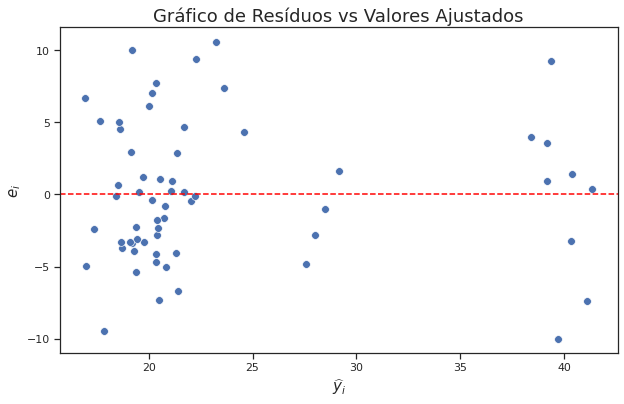

In [ ]:
#Resíduos vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_predict, y = residuos,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$e_i$',size = 15)
plt.title("Gráfico de Resíduos vs Valores Ajustados",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')
plt.savefig('Residuos vs Valores Ajustados')

Este gráfico foi feito pra análisar o pressuposto da linearidade dos dados e nele é possivel notar que os residuos se distribuem de forma aleatória em torno do valor 0, porém eles não estão muito dispersos ao longo da reta, se concentrando nos observações iniciais e finais. Além disso, também temos a presença de alguns outliers e isso pode estar impactando no ajuste do modelo

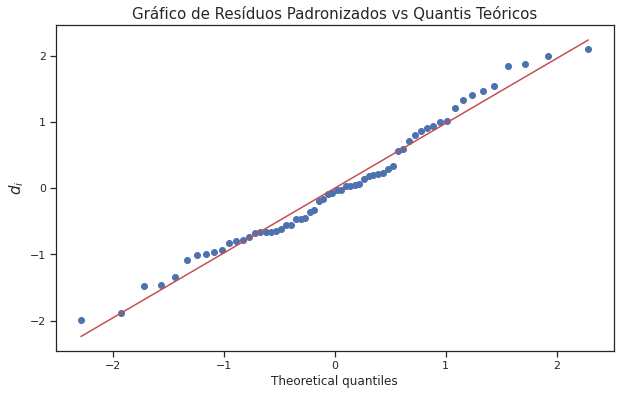

In [ ]:
#Residuos Estandardizados versus Quantis Teóricos (qqplot)
plt.figure(figsize=(10,6))
stats.probplot(residuos_padronizados, dist="norm", plot=plt)
plt.ylabel('$d_i$',size = 15)
plt.title("Gráfico de Resíduos Padronizados vs Quantis Teóricos",size = 15)
plt.savefig('Resíduos Padronizados vs Quantis Teóricos')

Este gráfico foi feito com o pressuposto de identificar se os resíduos padronizados seguem uma distribuição normal e como é possivel notar os pontos
tem um pequeno desvio da reta teórica. Contudo, nem mesmo amostras advindas da distribuição normal apresentam um comportamento em cima da reta de maneira perfeita. Como essas observações apresentam um pequeno desvio da reta elas podem ter um desvio de normalidade, mas em geral seu comportamento não indica problema e para confirmar isso faremos logo depois um teste de normalidade.

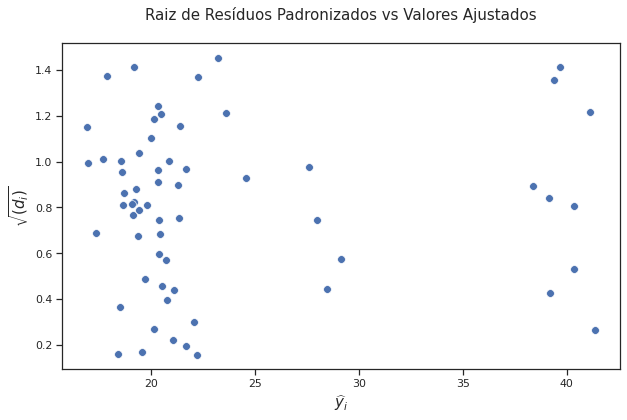

In [ ]:
#Raiz de Resíduos Estandardizados versus Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_predict, y = raiz_residuos_padronizados,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$\sqrt{(d_i)}$',size = 15)
plt.title("Raiz de Resíduos Padronizados vs Valores Ajustados\n",size = 15)
plt.savefig('Raiz de residuos vs valores ajustados')

Este gráfico é para verificar a homocedasticidade dos dados e apesar dos pontos estarem bastante concentrados nas observações iniciais e finais, os pontos aparentam estar dispersos em um padrão retangular o que indica que uma possivel homocedasticidade, entretanto é necessário um teste de hipótese para verificar isso.

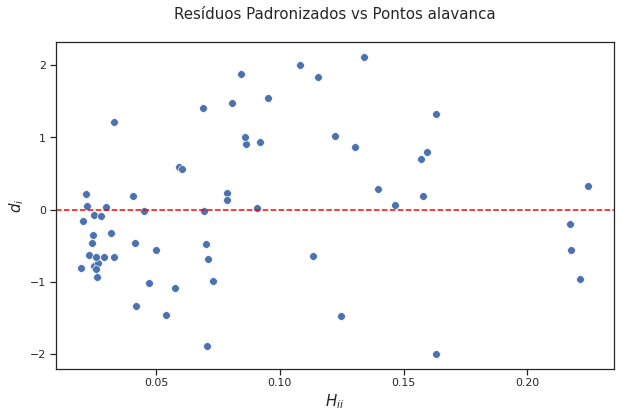

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = hat_ii, y = residuos_padronizados,s = 60)
plt.xlabel("$H_{ii}$",size = 15)
plt.ylabel('$d_i$',size = 15)
plt.title("Resíduos Padronizados vs Pontos alavanca\n",size = 15)
plt.axhline(y = 0, ls = '--', color = 'red')
plt.savefig('Resíduos vs pontos de alavanca')

Este gráfico foi feito para análisar os supostos outliers presentes nos dados e é possivel notar algumas observações muito afastadas da linha tracejada, o que indica a presença de alguns outliers o que também é possivel verificar no primeiro gráfico.

#**4) Testes nos Resíduos**
Faça um resumo dos resíduos do seu modelo e análise dos testes de normalidade, teste de
homocedasticidade e multicolinearidade para seus resíduos

In [ ]:
#resumo residuos padronizados
res = np.array([residuos_padronizados])
res = res.T
res = pd.DataFrame({'R.padronizados': res[:,0]})
round(res.describe(),3)

,R.padronizados
count,62.000
mean,0.000
std,0.967
min,-1.994
25%,-0.660
50%,-0.048
75%,0.677
max,2.108


Através do resumo obtido dos resíduos padronizados, comparando o seu maior valor com a sua mediana, podemos identificar a possível existência de outliers.

#Teste de Normalidade, Homocedasticidade e multicolinearidade


In [ ]:
#shapirotest

# shapiro_test = sts.shapiro(res)
# p_value = shapiro_test[1]
# p_value

def normality_test(x):
  shapiro_test = sts.shapiro(x)
  p_value = shapiro_test[1]
  print(p_value)
  if p_value > 0.05:
    return 'Os dados tem distribuição normal'
  else:
    return 'Os dados NÃO tem distribuição normal'


print(normality_test(residuos))

0.26891472935676575
Os dados tem distribuição normal


Para o teste de normalidade, utilizamos o teste de shapiro e testamos as seguintes hipóteses

$H_{0}$ = Normalidade dos dados vs $H_{1}$ = Não normalidade dos dados

aceita $H_{0}$ se $p > 0,05$

como $p = 0,269 > 0,05$ o teste indica que a distribuição dos dados é aproximadamente normal.

In [ ]:
#breuch pagan homocedasticity test
#regressao.model.exog = equivalente aos valores de X


def pagantest(x):
  test = sms.het_breuschpagan(x, regressao.model.exog)
  p_valor = test[1]
  print(p_valor)
  if p_valor > 0.05:
    return 'Há homocedasticidade'
  else:
    return 'Não Há homocedasticidade'



print(pagantest(residuos))


0.5911024449910767
Há homocedasticidade


Para o teste de homocedasticidade, utilizamos o teste de breusch pagan, que testa as seguintes hipóteses:

$H_{0}$: Há homocedasticidade vs $H_{1}$: Não Há homocedasticidade

aceita-se $H_{0}$ se $p > 0,05$

como $p = 0,59 > 0,05$ aceita-se $H_{0}$

In [ ]:
#multicolinearidade por VIF

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

vif_data = vif_data.iloc[1:,:]  
print(vif_data)


  feature       VIF
1      x1  1.111143
2      x2  1.005040
3      x3  1.005169
4      x4  1.111589


Durante a análise descritiva, obtivemos uma tabela de correlações entre as variáveis. Porém, nenhuma apresentou sinal de multicolinearidade (correlação acima de 0,9 entre covariáveis). Sendo assim, resolvemos testar pelo indicador VIF, onde o indicador apresenta multicolinearidade caso o VIF de alguma variável seja maior que 10. Como nenhuma variável apresentou VIF > 10 concluímos que não há multicolinearidade.



#**5) Resíduos Escalonados**
Apresente as estimativas de seu modelo (Betas), calcule os resíduos e QMres. Calcule os resíduos
padronizados, resíduos studentizados internamente, resíduos studentizados externamente, calcule
observações que podem ser remotas no espaço e faça um histograma delas e análise.

In [ ]:
n = len(dados)
p = 5

x_transposta_y = x_transposta.dot(y)
coeficientes = inversa_x_transposta_x.dot(x_transposta_y)
for i in range(len(coeficientes)):
  print(f'Beta{i} = {coeficientes[i]}')

beta0 = coeficientes[0]
beta1 = coeficientes[1]
beta2 = coeficientes[2]
beta3 = coeficientes[3]
beta4 = coeficientes[4]
#os mesmos betas do trabalho anterior

#residuos st int e externamente

si = [((n-p)*qmres - (j**2)/(1 - hat_ii[i]))/ (n-p-1) for i,j in enumerate(residuos)] #qmres sem a iesima obs
residuos_studentizados_internamente = [j/sqrt(qmres*(1-hat_ii[i])) for i,j in enumerate(residuos)]
residuos_studentizados_externamente = [j/sqrt(si[i]*(1-hat_ii[i])) for i,j in enumerate(residuos)]

Beta0 = 5.894525264770064
Beta1 = -0.47790133632035964
Beta2 = 0.18271374889868897
Beta3 = 35.402838724869646
Beta4 = 5.843913676577523


Agora que calculamos os resíduos studentizados internamente e externamente, iremos procurar identificar possíveis pontos de influência no modelo.

Text(0.5, 0, '$S^2_{i}$')

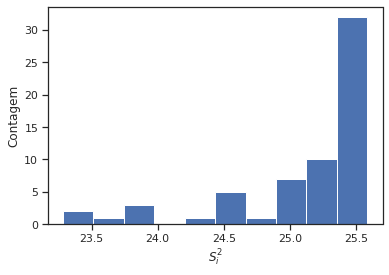

In [ ]:
plt.hist(si)
plt.ylabel('Contagem')
plt.xlabel('$S^2_{i}$')

O valor $S^2_{i}$ é o $QM_{res}$ sem a i-ésima observação, valores abaixo do $QM_{res}$ são possíveis pontos de influência. Sendo assim, como $QM_{res} = 25,1$ e segundo o histograma existem pontos abaixo desse valor, precisaremos identificar quais observações são possíveis outiliers.

In [ ]:
#procurando possíveis observações remotas

#Observações com resíduo padronizado maior que 2 

influente = [(i,j+1) for j,i in enumerate(residuos_padronizados) if abs(i) >= 2]
print(influente)


maxr = residuos_studentizados_internamente.index(max(residuos_studentizados_internamente))
print(maxr+1)
#a maior observação dos resíduos studentizados é a 21


##A vigésima primeira observação é um candidato a outlier
print(hat_ii[21]) #a vigésima primeira obs da matriz hat tem um valor maior que
#a maioria das observações
hat_valoresiguais = p/n # é menor que a 21, indica que deve ser influente
print(hat_valoresiguais)
#Agora iremos verificar se o qmres sem a 21 obs é menor do que qmres para todas
print(si[21]) ##O elemento i da matriz é a observação i+1 devido ao i = 0
if si[21] < qmres:
  print("A observação 22 é influente")



[(2.1076017130595446, 22)]
22
0.13391279671895923
0.08064516129032258
23.283353031978866
A observação 22 é influente


Usando a tabela de resíduos padronizados, cujos valores residuais $d_{i} > 2$ são nossos candidados a pontos influentes, identificamos que a $22ª$ observação é a única com resíduo padronizado maior que 2

Restringindo a análise para a $22ª$ observação, também identificamos que a mesma possuí o maior resíduo studentizado. 

Visto isso, iremos comparar o $S^2_{22}$ e verificar se ele é menor que o $QM_{res}$

$S^2_{22} = 23,28 < QM_{res}$ e portanto, concluímos por esses testes que a observação 22 é um outlier.

#**6) Comparações dos Resíduos Escalonados**
Monte um quadro comparativo com os resultados obtidos no item anterior e faça análise de cada um
dos resíduos calculados (veja o análisis apresentado na aula 17 pela professora).

In [ ]:
tabela_res = pd.DataFrame({
    "residuos":residuos,
    "residuos_padronizados":residuos_padronizados,
    "residuos_studentizados_externamente":residuos_studentizados_externamente,
    "residuos_studentizados_internamente":residuos_studentizados_internamente
})

In [ ]:
s = ''
digits = 3
for i in range(tabela_res.shape[0]):
    s+= "\\textbf{"+str(i+1)+"} & "
    for j in range(tabela_res.shape[1]):
        s+= f"{round(tabela_res.iloc[i,j],digits)} & "
    s+= "\\\\\n"
print(s)

\textbf{1} & 4.32 & 0.862 & 0.923 & 0.924 & \\
\textbf{2} & 7.376 & 1.471 & 1.553 & 1.534 & \\
\textbf{3} & 4.692 & 0.936 & 0.982 & 0.982 & \\
\textbf{4} & 7.026 & 1.401 & 1.467 & 1.452 & \\
\textbf{5} & 6.105 & 1.218 & 1.244 & 1.238 & \\
\textbf{6} & 4.566 & 0.911 & 0.952 & 0.953 & \\
\textbf{7} & 0.14 & 0.028 & 0.029 & 0.029 & \\
\textbf{8} & 2.952 & 0.589 & 0.604 & 0.607 & \\
\textbf{9} & 5.119 & 1.021 & 1.092 & 1.09 & \\
\textbf{10} & 10.02 & 1.999 & 2.185 & 2.116 & \\
\textbf{11} & 5.048 & 1.007 & 1.054 & 1.053 & \\
\textbf{12} & 6.661 & 1.329 & 1.467 & 1.452 & \\
\textbf{13} & 2.843 & 0.567 & 0.582 & 0.585 & \\
\textbf{14} & 0.968 & 0.193 & 0.195 & 0.197 & \\
\textbf{15} & 1.182 & 0.236 & 0.244 & 0.246 & \\
\textbf{16} & -2.793 & -0.557 & -0.568 & -0.571 & \\
\textbf{17} & -4.661 & -0.93 & -0.941 & -0.942 & \\
\textbf{18} & -3.398 & -0.678 & -0.7 & -0.703 & \\
\textbf{19} & -5.411 & -1.079 & -1.114 & -1.112 & \\
\textbf{20} & -2.291 & -0.457 & -0.459 & -0.462 & \\
\textbf{21} & -

In [ ]:
si[21]

23.283353031978866

In [ ]:
np.arange(62)[hat_ii>0.2]

array([49, 50, 51, 52])

In [ ]:
si[21]

23.283353031978866

In [ ]:
si[22]

23.85436447097667

In [ ]:
si[34]

23.862444010323145

In [ ]:
si[55]

23.45334373940279

In [ ]:
np.arange(62)[np.array(si)<24]

array([ 9, 21, 22, 34, 55, 60])

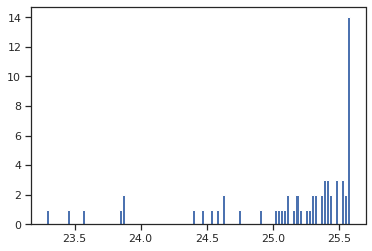

In [ ]:
plt.hist(si, bins=100);

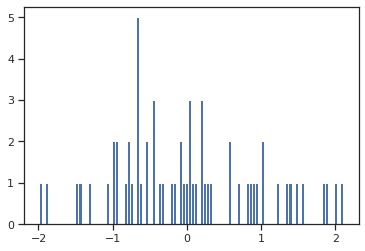

In [ ]:
plt.hist(residuos_padronizados, bins=100);

In [ ]:
residuos_studentizados_externamente = np.array(residuos_studentizados_externamente)
residuos_padronizados = np.array(residuos_padronizados)

In [ ]:
np.arange(62)[(residuos_studentizados_externamente-residuos_padronizados)>0.15]

array([ 9, 21, 60])

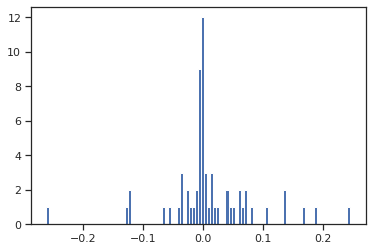

In [ ]:
plt.hist((residuos_studentizados_externamente-residuos_padronizados), bins=100);

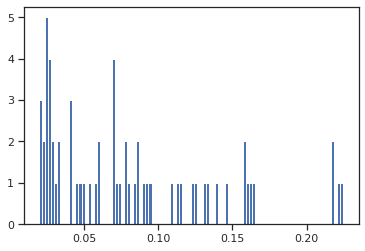

In [ ]:
plt.hist(hat_ii, bins=100);

In [ ]:
(residuos_studentizados_externamente-residuos_padronizados)[34]

-0.12189545027504001

#**7) Gráfico de Resíduos versus Ajuste** 
Faça e apresente a análise do Gráfico para cada um dos resíduos calculados no item 5 versus Valores
ajustados. (São 4 gráficos).


#**8) Transformações**
Proponha uma transformação para seu modelo que corrija possíveis problemas nos supostos e
compare. (Se seu modelo não apresenta conflito com nenhum dos suposto de todas maneiras
proponha uma transformação e compare os dois modelos). A comparação deve ser feita refazendo os
itens 1 até 7 do novo modelo com a transformação versus modelo original.


Como visto anteriormente, o teste de homocedasticidade deu positivo, e para reforçar a constância da variãncia, fizemos o gráfico do resíduos studentizados.

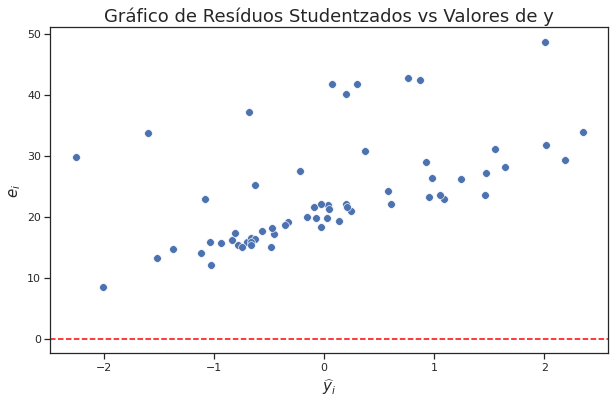

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = residuos_studentizados_externamente, y = y,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$e_i$',size = 15)
plt.title("Gráfico de Resíduos Studentzados vs Valores de y",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')

Como os dados não estão dispersos de forma 'afunilada', reforçamos que não temos problemas com eles. Mas, vamos tentar normalizar mais ainda a distribuição, utilizando o boxcox.

Text(0.5, 1.0, 'Probplot against normal distribution')

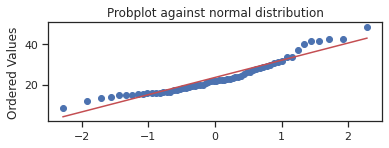

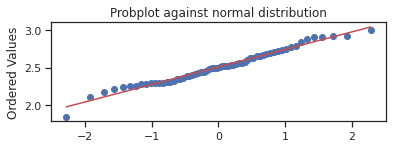

In [ ]:
yt,_ = sts.boxcox(y)

fig = plt.figure()
ay1 = fig.add_subplot(211)
prob = sts.probplot(y,dist=sts.norm,plot=ay1)
ay1.set_xlabel('')
ay1.set_title('Probplot against normal distribution')

fig = plt.figure()
ay2 = fig.add_subplot(212)
prob = sts.probplot(yt,dist=sts.norm,plot=ay2)
ay2.set_xlabel('')
ay2.set_title('Probplot against normal distribution')

# print(yt)
# print(y)

Com o gráfico mais linear, vamos refazer os passos de 1 a 7 e comparar.

In [ ]:
novosDados = dados.copy()
# for i in range(len(yt)):
#   novosDados['y'][i] = yt[i]
novosDados['y'] = yt
# print(novosDados)
# print(dados)

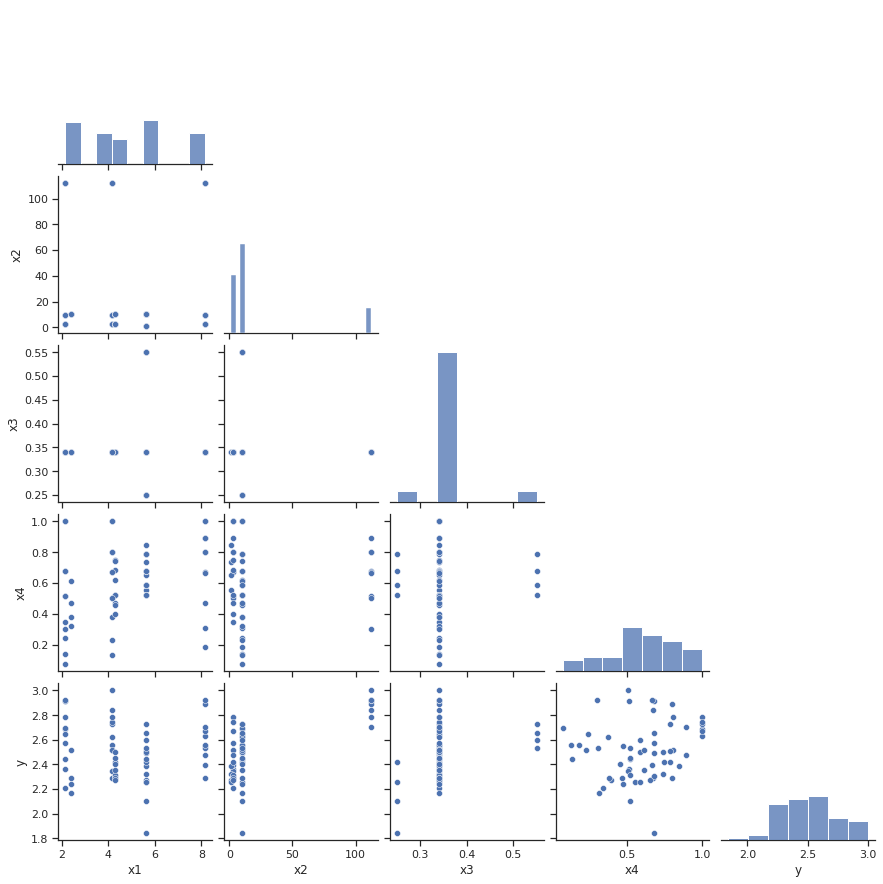

In [ ]:
sns.pairplot(novosDados.drop(['H_ii'],axis=1), corner=True)
plt.savefig('pairplot.pdf')

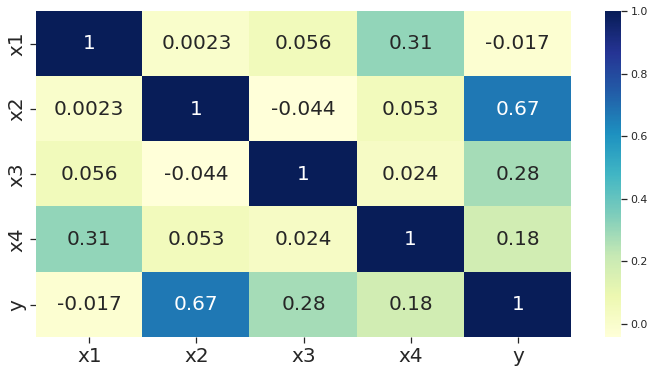

In [ ]:
sns.set_theme(style="ticks")
p = plt.figure(figsize = (12,6))
p = sns.heatmap(novosDados.drop(['H_ii'],axis=1).corr(),cmap="YlGnBu",annot = True, annot_kws={'size':20})
p.set_yticklabels(list(novosDados.columns), size = 20)
p.set_xticklabels(list(novosDados.columns), size = 20)
plt.savefig('corr.pdf')

#Matriz Hat

In [ ]:
novosDados['H_ii'] = hat_ii
novosDados

,x1,x2,x3,x4,y,H_ii
0,2.14,10.0,0.34,1.000,2.686820,0.130355
1,4.14,10.0,0.34,1.000,2.730551,0.080694
2,8.15,10.0,0.34,1.000,2.629780,0.091969
3,2.14,10.0,0.34,0.246,2.648680,0.068995
4,4.14,10.0,0.34,0.379,2.622524,0.032821
...,...,...,...,...,...,...
57,4.14,112.0,0.34,0.672,2.840613,0.113413
58,8.15,112.0,0.34,0.801,2.887412,0.157829
59,2.14,112.0,0.34,0.306,2.924853,0.157234
60,4.14,112.0,0.34,0.506,3.000965,0.115580


#Analise residuos

In [ ]:
novaRegressao = sm.OLS(yt,X2).fit()

#Calculando os resíduos 
qmres = 25.13664
novo_y_predict = novaRegressao.predict(X2)
novosResiduos = novaRegressao.resid
novosResiduos_padronizados = [i/sqrt(qmres) for i in novosResiduos]
novaRaiz_residuos_padronizados = [sqrt(abs(i)) for i in novosResiduos_padronizados]

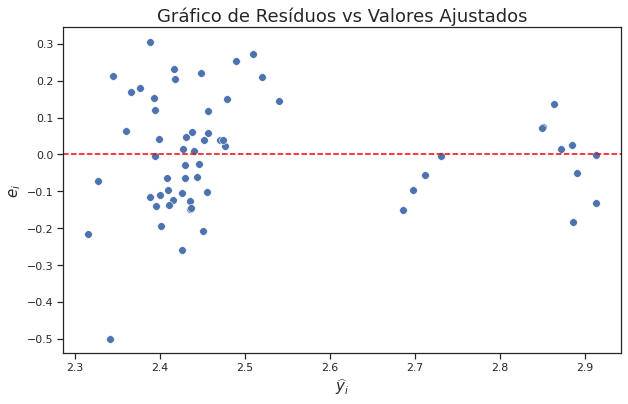

In [ ]:
#Resíduos vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = novo_y_predict, y = novosResiduos,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$e_i$',size = 15)
plt.title("Gráfico de Resíduos vs Valores Ajustados",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')

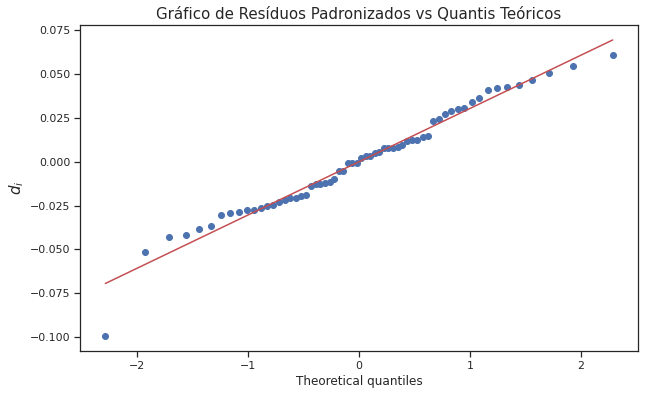

In [ ]:
#Residuos Estandardizados versus Quantis Teóricos (qqplot)
plt.figure(figsize=(10,6))
stats.probplot(novosResiduos_padronizados, dist="norm", plot=plt)
plt.ylabel('$d_i$',size = 15)
plt.title("Gráfico de Resíduos Padronizados vs Quantis Teóricos",size = 15)
plt.show()

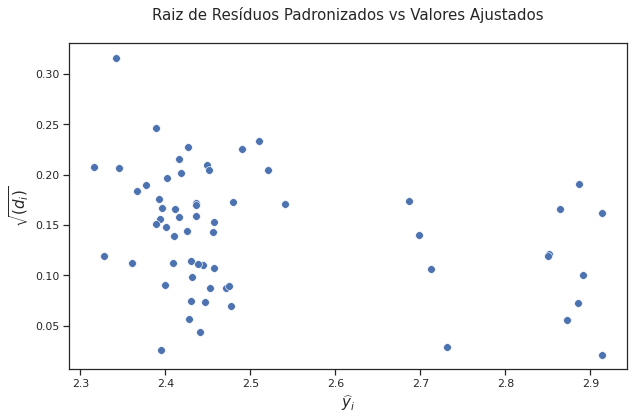

In [ ]:
#Raiz de Resíduos Estandardizados versus Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = novo_y_predict, y = novaRaiz_residuos_padronizados,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$\sqrt{(d_i)}$',size = 15)
plt.title("Raiz de Resíduos Padronizados vs Valores Ajustados\n",size = 15)
plt.show()

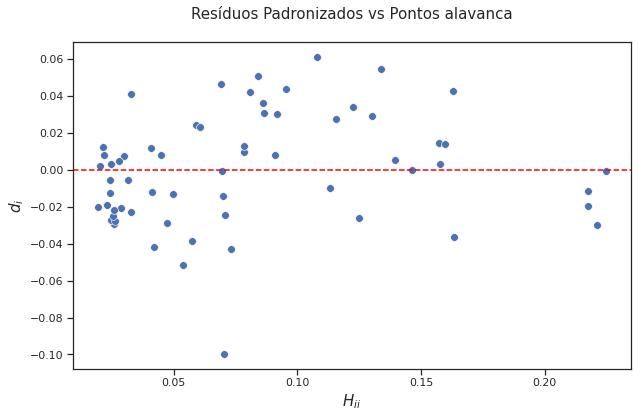

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = hat_ii, y = novosResiduos_padronizados,s = 60)
plt.xlabel("$H_{ii}$",size = 15)
plt.ylabel('$d_i$',size = 15)
plt.title("Resíduos Padronizados vs Pontos alavanca\n",size = 15)
plt.axhline(y = 0, ls = '--', color = 'red')
plt.show()

In [ ]:
# print(residuos_padronizados)
# print(novosResiduos_padronizados)

#Teste nos Residuos

In [ ]:
#resumo residuos padronizados
novoRes = np.array([novosResiduos_padronizados])
novoRes = novoRes.T
novoRes = pd.DataFrame({'novoR.padronizados': novoRes[:,0]})
round(novoRes.describe(),3)

,novoR.padronizados
count,62.000
mean,0.000
std,0.030
min,-0.100
25%,-0.021
50%,0.001
75%,0.021
max,0.061


In [ ]:
#shapirotest

print(normality_test(novosResiduos))

0.22347509860992432
Os dados tem distribuição normal


In [ ]:
#Homocedasticidade

print(pagantest(novosResiduos))

0.27041134627191143
Há homocedasticidade


In [ ]:
#multicolinearidade por VIF

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

vif_data = vif_data.iloc[1:,:]  
print(vif_data)


  feature       VIF
1      x1  1.111143
2      x2  1.005040
3      x3  1.005169
4      x4  1.111589


#Residuos escalonados

In [ ]:
n = len(novosDados)
p = 5

x_transposta_yt = x_transposta.dot(yt)
novosCoeficientes = inversa_x_transposta_x.dot(x_transposta_yt)
for i in range(len(novosCoeficientes)):
  print(f'Beta{i} = {novosCoeficientes[i]}')

beta0 = novosCoeficientes[0]
beta1 = novosCoeficientes[1]
beta2 = novosCoeficientes[2]
beta3 = novosCoeficientes[3]
beta4 = novosCoeficientes[4]
#os mesmos betas do trabalho anterior

#residuos st int e externamente

novosi = [((n-p)*qmres - (j**2)/(1 - hat_ii[i]))/ (n-p-1) for i,j in enumerate(novosResiduos)]
novos_residuos_studentizados_internamente = [j/sqrt(qmres*(1-hat_ii[i])) for i,j in enumerate(novosResiduos)]
novos_residuos_studentizados_externamente = [j/sqrt(si[i]*(1-hat_ii[i])) for i,j in enumerate(novosResiduos)]


Beta0 = 1.9360735418421011
Beta1 = -0.01015535794677634
Beta2 = 0.004165771381854707
Beta3 = 1.2350333904534667
Beta4 = 0.16500229570217026


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  4., 10., 45.]),
 array([25.58071626, 25.58119548, 25.5816747 , 25.58215392, 25.58263314,
        25.58311236, 25.58359158, 25.5840708 , 25.58455002, 25.58502924,
        25.58550847]),
 <a list of 10 Patch objects>)

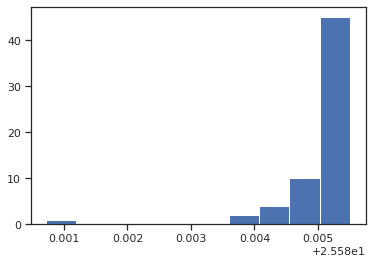

In [ ]:
plt.hist(novosi)

In [ ]:
#procurando possíveis observações remotas

#Observações com resíduo padronizado maior que 2 

novoInfluente = [(i,j) for j,i in enumerate(novosResiduos_padronizados) if i >= 2]
print(novoInfluente)

#Agora nao há mais aquele ponto influente visto no modeleo anterior

[]


#Comparações dos residuos padronizados

In [ ]:
nova_tabela_res = pd.DataFrame({
    "novosResiduos":novosResiduos,
    "novosResiduos_padronizados":novosResiduos_padronizados,
    "novos_residuos_studentizados_externamente":novos_residuos_studentizados_externamente,
    "novos_residuos_studentizados_internamente":novos_residuos_studentizados_internamente
})

s = ''
digits = 3
for i in range(tabela_res.shape[0]):
    s+= "\\textbf{"+str(i+1)+"} & "
    for j in range(tabela_res.shape[1]):
        s+= f"{round(tabela_res.iloc[i,j],digits)} & "
    s+= "\\\\\n"
# print(s)

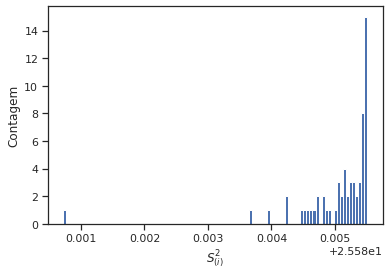

In [ ]:
plt.hist(novosi, bins=100);
plt.xlabel("$S_{(i)}^2$")
plt.ylabel("Contagem")
plt.savefig("novosi_hist.pdf")


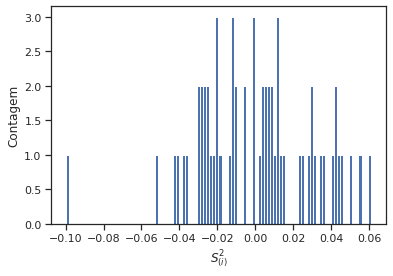

In [ ]:
plt.hist(novosResiduos_padronizados, bins=100);
plt.xlabel("$S_{(i)}^2$")
plt.ylabel("Contagem")
plt.savefig("novosi_hist.pdf")

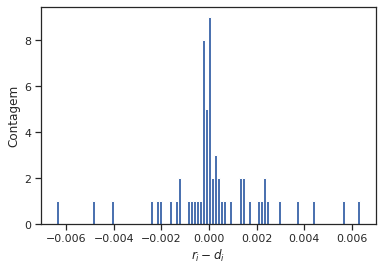

In [ ]:
novos_residuos_studentizados_externamente = np.array(novos_residuos_studentizados_externamente)
novosResiduos_padronizados = np.array(novosResiduos_padronizados)

plt.hist((novos_residuos_studentizados_externamente-novosResiduos_padronizados), bins=100);
plt.xlabel("$r_i - d_i$")
plt.ylabel("Contagem")
plt.savefig("novoridi_hist.pdf")

#Gráfico de resíduos vs Ajuste

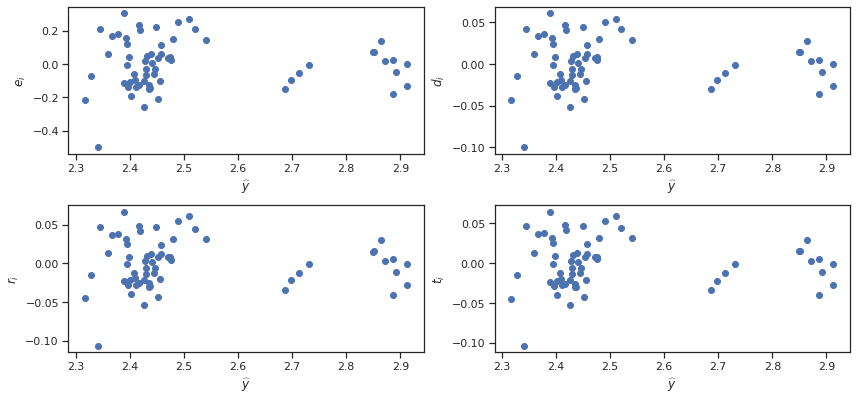

In [ ]:
plt.rcParams['figure.figsize'] = (14,6)
fig, axs = plt.subplots(2,2, )
axs[0,0].scatter(novo_y_predict, novosResiduos)
axs[0,0].set_xlabel("$\widehat{y}$")
axs[0,0].set_ylabel("$e_i$")

axs[0,1].scatter(novo_y_predict, novosResiduos_padronizados)
axs[0,1].set_xlabel("$\widehat{y}$")
axs[0,1].set_ylabel("$d_i$")

axs[1,0].scatter(novo_y_predict, novos_residuos_studentizados_externamente)
axs[1,0].set_xlabel("$\widehat{y}$")
axs[1,0].set_ylabel("$r_i$")

axs[1,1].scatter(novo_y_predict, novos_residuos_studentizados_internamente)
axs[1,1].set_xlabel("$\widehat{y}$")
axs[1,1].set_ylabel("$t_i$")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

fig.savefig("novograf_1234.pdf")


(array([ 6., 22., 18.,  3.,  0.,  0.,  4.,  0.,  2.,  7.]),
 array([2.31633238, 2.37600118, 2.43566998, 2.49533878, 2.55500758,
        2.61467638, 2.67434518, 2.73401398, 2.79368278, 2.85335158,
        2.91302038]),
 <a list of 10 Patch objects>)

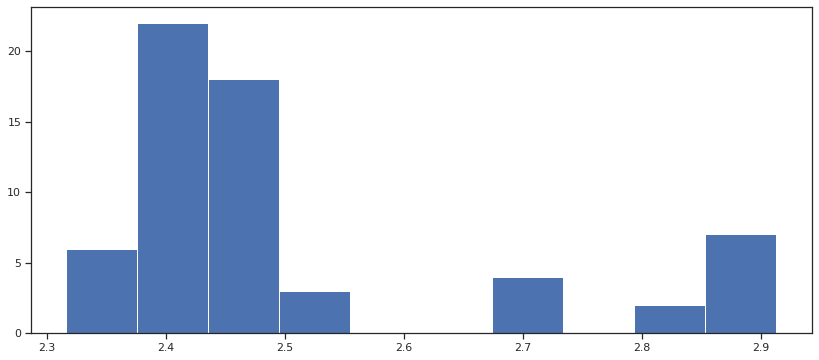

In [ ]:
plt.hist(novo_y_predict)

#**9) Teste de Falta de Ajuste**
Proponha um caso ou exemplo onde seja necessário a aplicação do teste de falta de ajuste, faça
gráfico resíduos versus valores ajustados e mostre a falta de ajuste dos dados, ajuste o modelo, faça
análise da anova, calcule o SQEP, o SQFA e análise do teste F0. Nota: para este ponto o grupo deverá
propor o dataset, pode ser simulado mas não pode ser igual ao ilustrado no montgomery que é o
mesmo dado na aula de laboratório 3.


In [ ]:
xr = [2,2,5.4,7.5,7.5,7.5,3.9,4.2,8.2,8.2,8.2,12.8,12.8,9.3,11]
y = [0.23,2,3.45,4,5.33,7.84,11,13.33,14.2,17.59,11,9.89,8.56,7.55,11]

d = {'x': xr, 'y': y}

dados = pd.DataFrame(d)

X = dados['x']
y = dados['y']
X = sm.add_constant(X)
#dados = dados.to_numpy()
print(dados)

dados

m = 9
n = 15


yi_barra = [1.115, 3.45, 5.72,11,13.33,14.26,9.225,7.55,11] #feito a mao por ter poucas observacpes
erropuro = [1.566,0,7.596,0,0,21.7112,0.884,0,0] #feito a mao por ter poucas observacoes

sq_erropuro = sum(erropuro)
qm_erropuro = sq_erropuro/(n-m)

       x      y
0    2.0   0.23
1    2.0   2.00
2    5.4   3.45
3    7.5   4.00
4    7.5   5.33
5    7.5   7.84
6    3.9  11.00
7    4.2  13.33
8    8.2  14.20
9    8.2  17.59
10   8.2  11.00
11  12.8   9.89
12  12.8   8.56
13   9.3   7.55
14  11.0  11.00


In [ ]:
regression = sm.OLS(y,X).fit()
print(regression.summary(alpha = 0.05))
resid = regression.resid
y_predito = regression.predict(X)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.588
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.132
Time:                        20:03:11   Log-Likelihood:                -43.034
No. Observations:                  15   AIC:                             90.07
Df Residuals:                      13   BIC:                             91.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1961      2.905      1.444      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
print('SQep:', sq_erropuro)
print('QMep:', qm_erropuro)


sqres = sum([(y0 - y1)**2 for y0,y1 in zip(y,y_predito)])
print('SQres:', sqres)
qmres = sqres/(n-2)
print('QMres:', qmres)


y_barra = sum(y)/n

sqreg = sum([(y0 - y_barra)**2 for y0 in y_predito])
print('SQreg:', sqreg)
qmreg = sqreg 
print('QMreg:',qmreg)

sqtotal = sqreg + sqres
qmtotal = sqtotal/(n-1)
print('SQtotal:', sqtotal)

sqfa = sqres - sq_erropuro
qmfa = sqfa/(m-2)
print('SQFa: ',sqfa)
print('QMFa: ', qmfa)




Ffa = qmfa/qm_erropuro
print('Ffa :', Ffa)
F = qmreg/qmres
print('F: ', F)
inf,sup = f.interval(0.9,m-2, n- m)
print(sup)

if Ffa > sup:
  print('Rejeitamos H0, o modelo esta fora de ajuste')

SQep: 31.757200000000005
QMep: 5.292866666666668
SQres: 272.62611099401937
QMres: 20.97123930723226
SQreg: 54.27026233931386
QMreg: 54.27026233931386
SQtotal: 326.89637333333326
SQFa:  240.86891099401936
QMFa:  34.409844427717054
Ffa : 6.5011734840068485
F:  2.5878424037914587
4.2066584878692055
Rejeitamos H0, o modelo esta fora de ajuste


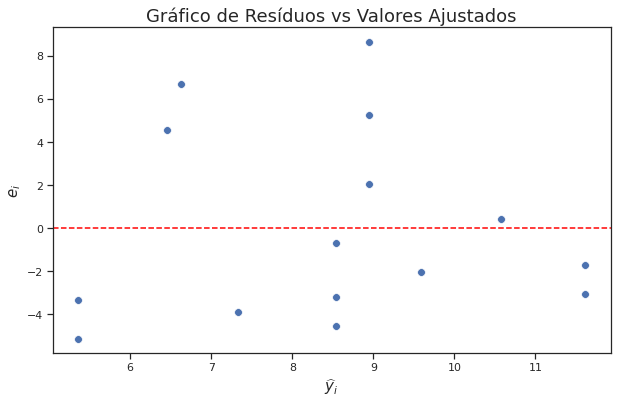

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_predito, y = resid,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$e_i$',size = 15)
plt.title("Gráfico de Resíduos vs Valores Ajustados",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')

plt.savefig('teste_ajuste.pdf')

#**10) Mínimos Quadrados Ponderados**
Mínimos Quadrados Ponderados Proponha um caso ou exemplo onde seja necessário a aplicação da
técnica dos mínimos quadrados ponderados e faça o respectivo análise. Nota: para este ponto o grupo
deverá propor o dataset, pode ser simulado mas não pode ser igual ao ilustrado na aula de laboratório
3.

In [ ]:
# Dados simulados: 50 grupos de 10 observações cada
dadosReplicas = pd.DataFrame({'Grupo':np.repeat(range(1,51), 10), 'Y':np.nan, 'X':np.nan})
dadosReplicas['X'] = dadosReplicas['Grupo'].apply(lambda x: x + np.random.normal(0, x/2))
dadosReplicas['Y'] = dadosReplicas.apply(lambda row: 0.25*row['X'] + np.random.normal(0,row['Grupo']), axis=1)

# Agregando as observações por grupo
dadosAgrupados = dadosReplicas.groupby('Grupo').agg({'Y':['mean','std'], 'X':'mean'}).reset_index(level=0, drop=True)
dadosAgrupados.columns = ['Y', 'Desv. padrão (Y)', 'X']

# Dados finais a serem utilizados no modelo
dadosAgrupados

,Y,Desv. padrão (Y),X
0,0.147389,0.769552,1.014453
1,1.193479,1.937152,2.608371
2,-1.227287,5.549134,2.838795
3,-0.461247,4.411467,4.184351
4,1.531481,7.063548,4.905057
5,2.306217,5.107735,6.388657
6,3.455054,6.717427,8.868233
7,2.494576,7.796899,7.655303
8,6.084469,7.683109,8.740171
9,2.201038,6.108351,9.763212


In [ ]:
# Implementando o modelo sem ponderação
x = dadosAgrupados['X']
x = sm.add_constant(x)
y = dadosAgrupados['Y']
modelo = sm.OLS(y,x).fit()
print(modelo.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.841
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.181
Time:                        16:59:25   Log-Likelihood:                -178.92
No. Observations:                  50   AIC:                             361.8
Df Residuals:                      48   BIC:                             365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8721      2.535      1.133      0.2

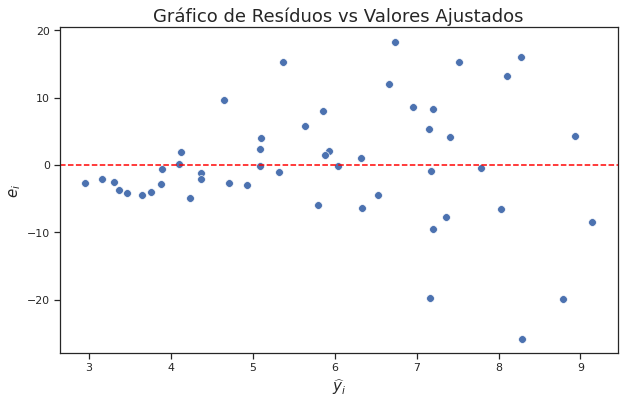

In [ ]:
# Calculando os resíduos
y_predict = modelo.predict(x)
residuos = modelo.resid

# Resíduos vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_predict, y = residuos,s = 60)
plt.xlabel("$\widehat{y}_i$",size = 15)
plt.ylabel('$e_i$',size = 15)
plt.title("Gráfico de Resíduos vs Valores Ajustados",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')

plt.savefig('MQP - resíduos base.pdf')

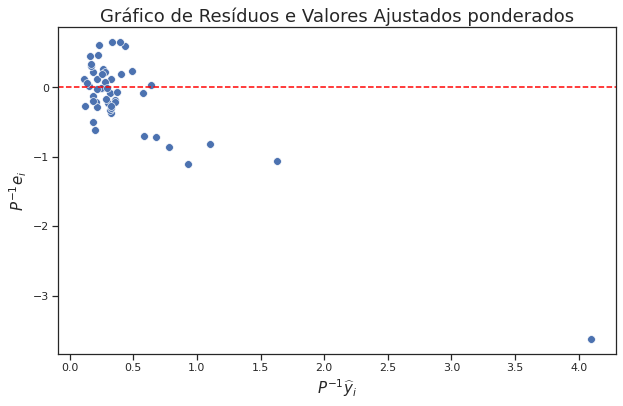

In [ ]:
# Ponderando o modelo:
P = np.diag(dadosAgrupados['Desv. padrão (Y)'])
Pinv = np.diag(1/dadosAgrupados['Desv. padrão (Y)'])

# Resíduos vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x = np.diag(np.array(y_predict)*Pinv), y = np.diag(np.array(residuos)*Pinv),s = 60)
plt.xlabel("$P^{-1}\widehat{y}_i$",size = 15)
plt.ylabel('$P^{-1}e_i$',size = 15)
plt.title("Gráfico de Resíduos e Valores Ajustados ponderados",size = 18)
plt.axhline(y = 0, ls = '--', color = 'red')

plt.savefig('MQP - resíduos ponderado.pdf')